### **Preprocessing Setup**  

Imports necessary libraries and downloads  **NLTK resources** for text preprocessing.  

In [1]:
import nltk
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ANH
[nltk_data]     KHOA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Setting Up the Project Path for Imports**

In [2]:
import os
import sys
print(os.getcwd())
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../../")) 
sys.path.append(project_root)  # Ensure src/ is found

d:\HCMUT\Courses\HK242\ML\ML_capybara\src\models\BN model


### **Loading Dataset and Train the Bayesian Network**


In [3]:
from src.models.BN_model import SentimentBayesianNetwork  
from src.data.preprocess import Preprocessing  
from sklearn.model_selection import train_test_split



pre_proc = Preprocessing()
# Load dataset
file_path = 'test.csv'
df = pre_proc.read_CSV(file_path)

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['sentiment'])

model = SentimentBayesianNetwork(train_df, pre_proc)




Vocavulary size:  6292


### **Evaluating the Sentiment Bayesian Network Model**

Computes metrics: **F1-score, and a confusion matrix** to evaluate the model.



Model F1-score (Weighted): 0.5536

Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.58      0.57       100
    positive       0.52      0.51      0.51       143
     neutral       0.60      0.59      0.59       111

    accuracy                           0.55       354
   macro avg       0.56      0.56      0.56       354
weighted avg       0.55      0.55      0.55       354



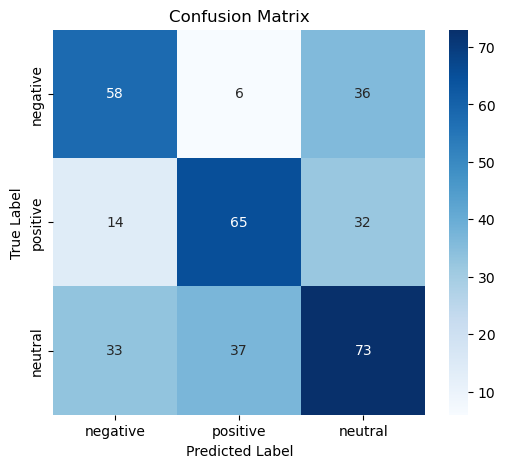

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
true_labels = test_df['sentiment'].tolist()

predicted_labels = []
for text in test_df['text']:
    probs, labels = model.infer(text)  
    predicted_sentiment = labels[probs.argmax()]  
    predicted_labels.append(predicted_sentiment)

# Compute statistic
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
report = classification_report(true_labels, predicted_labels, target_names=labels)

print(f"\nModel F1-score (Weighted): {f1:.4f}")
print("\nClassification Report:\n", report)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Macro-Averaged ROC AUC Score: 0.7400
Weighted ROC AUC Score: 0.7289


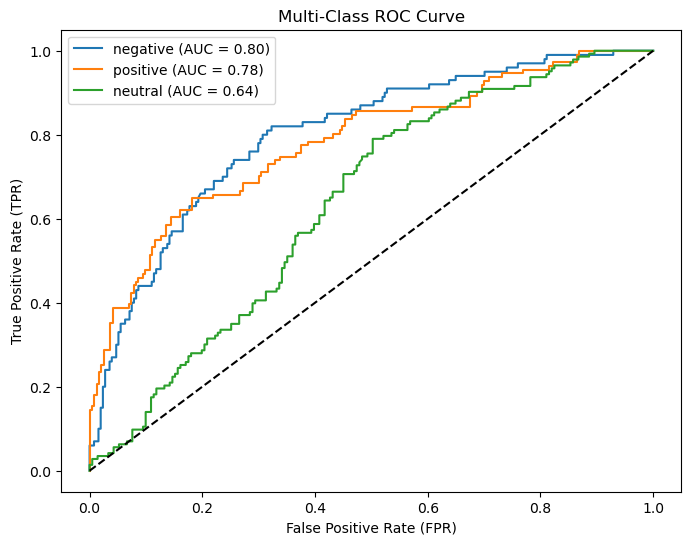

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


label_map = {label: idx for idx, label in enumerate(labels)}  # {'negative': 0, 'neutral': 1, 'positive': 2}
label_encode = [label_map[label] for label in true_labels]

# Convert labels to one-hot encoding for ROC-AUC calculation
label_onehot = label_binarize(label_encode, classes=range(len(labels)))
predicted_probs = [model.infer(text)[0] for text in test_df['text']]  # Get predicted probabilities

# Compute ROC-AUC Score (macro & weighted)
roc_auc_macro = roc_auc_score(label_onehot, predicted_probs, average='macro', multi_class='ovr')
roc_auc_weighted = roc_auc_score(label_onehot, predicted_probs, average='weighted', multi_class='ovr')

print(f"Macro-Averaged ROC AUC Score: {roc_auc_macro:.4f}")
print(f"Weighted ROC AUC Score: {roc_auc_weighted:.4f}")

# Plot the ROC Curve for each class
plt.figure(figsize=(8, 6))

for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(label_onehot[:, i], np.array(predicted_probs)[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()
